# import

In [300]:
import pandas as pd
import seaborn as sns
import plotly.express
import numpy as np
import matplotlib.pyplot as plt

In [301]:
activities=pd.read_csv('activities.csv',encoding='latin-1',parse_dates=['date_'],dayfirst=True)
athletes=pd.read_csv('athletes.csv',encoding='latin-1')
summary=pd.read_csv('summary.csv',encoding='latin-1')
kudos_and_comms=pd.read_csv('kudos_and_comms.csv',encoding='latin-1').rename(columns={'ï»¿athlete_ID':'Athlete_ID'})

In [302]:
activities_per_ath=activities.groupby('Athlete_ID').count().reset_index()[['Athlete_ID','ID']].rename(columns={'ID':'number_of_activities'})
activities_per_ath

,Athlete_ID,number_of_activities
0,61723,319
1,150168,374
2,183769,224
3,186522,379
4,196354,392
...,...,...
1030,73904457,12
1031,73908109,17
1032,76509671,26
1033,77494978,48


In [303]:
activities=activities.merge(activities_per_ath,on='Athlete_ID')

In [304]:
data_athletes=athletes[['gender','ID',]].rename(columns={
    'ID':'Athlete_ID'})
data_athletes=data_athletes.merge(activities,on='Athlete_ID')

In [305]:
activities.Athlete_ID.nunique()

1035

In [306]:
kudos_and_comms

,Athlete_ID,kudos_byAthlete_SinceLastAct,comments_byAthlete_SinceLastAct
0,1010986,0,0
1,1010986,0,0
2,1010986,0,0
3,1010986,0,0
4,1010986,0,0
...,...,...,...
278344,945963,61,0
278345,945963,0,0
278346,945963,52,0
278347,945963,0,0


In [307]:
kudos_and_comms.Athlete_ID.nunique()

1158

In [308]:
avg_kudos_and_comms_by_ath=kudos_and_comms.groupby('Athlete_ID').mean().reset_index()[['Athlete_ID','kudos_byAthlete_SinceLastAct',
                                                                             'comments_byAthlete_SinceLastAct']].rename(
     columns={'kudos_byAthlete_SinceLastAct':'Average kudos given by athlete between activites',
              'comments_byAthlete_SinceLastAct':'Average comments given by athlete between activites'})
data_athletes=data_athletes.merge(avg_kudos_and_comms_by_ath,on='Athlete_ID')
data_athletes.describe()

,Athlete_ID,ID,distance,relative_effort,elevation,calories,temperature,feels_like,wind_speed,heart_rate,...,cadence,max_cadence,kudos,comments,acheivments,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites
count,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,...,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0,259733.0
mean,23933829.476470068,4042459854.3337502,34.07024894794818,14.726010942005828,172.1269018568946,1106.5870220572665,70.4012158639834,81.1149064616356,1.7434430742339062,46.32653823002836,...,24.26970895342538,21.42588350344392,187.97281054005458,1.1667674111491415,1.8137664447721313,1.1796883722900056,1.7259416400688399,463.5351880585062,8.49898229561376,0.028045722859602735
std,16833152.217097558,644135525.4071914,248.23857096766343,53.21229147678351,374.61767772586603,167889.34798861848,39.10842572886878,34.595112586326366,6.246840695276876,64.50108717228525,...,37.25051605988497,43.91538931807731,420.9348856720168,3.9783109550624616,5.912667587378337,3.0286446857945126,5.881367654888545,326.495350048752,16.782250546836874,0.13250560197265965
min,61723.0,2047015311.0,0.0,-1.0,-1.0,-1.0,-64.0,-36.0,-1.0,-1.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
25%,10504434.0,3487636002.0,4.96,-1.0,10.0,113.0,24.0,99.0,-1.0,-1.0,...,-1.0,-1.0,48.0,0.0,0.0,0.0,0.0,237.0,0.25609756097560976,0.0
50%,19766391.0,4043961876.0,10.71,-1.0,57.0,453.0,99.0,99.0,-1.0,-1.0,...,-1.0,-1.0,113.0,0.0,0.0,0.0,0.0,385.0,2.017391304347826,0.0
75%,36846040.0,4575032247.0,30.44,-1.0,191.0,871.0,99.0,99.0,-1.0,118.17399999999999,...,65.3567,0.0,197.0,0.0,1.0,1.0,1.0,584.0,8.92722371967655,0.009216589861751152
max,78820492.0,6361157572.0,65698.0,4101.0,61958.0,60735556.0,99.0,99.0,72.0,243.0,...,188.953,900.0,18470.0,241.0,295.0,158.0,295.0,1966.0,764.6666666666666,2.337468982630273


In [309]:
data_athletes=data_athletes[data_athletes.gender!='-']

In [310]:
list(data_athletes.columns)

['gender',
 'Athlete_ID',
 'ID',
 'activity_type',
 'date_',
 'day_',
 'day_time',
 'area',
 'country',
 'distance',
 'distance_unit',
 'moving_time',
 'pace',
 'pace_units',
 'relative_effort',
 'elevation',
 'elevation_unit',
 'calories',
 'elapsed_time',
 'device',
 'temperature',
 'temperature_unit',
 'weather_label',
 'humidity',
 'feels_like',
 'wind_speed',
 'wind_speed_unit',
 'heart_rate',
 'max_hr',
 'speed',
 'max_speed',
 'cadence',
 'max_cadence',
 'mbr_1',
 'mbr_2',
 'group_activity',
 'photos',
 'kudos',
 'comments',
 'acheivments',
 'photo_count',
 'segments_achievements',
 'number_of_activities',
 'Average kudos given by athlete between activites',
 'Average comments given by athlete between activites']

In [311]:
data_athletes.Athlete_ID.nunique()

1000

In [312]:
per_athlete=data_athletes.groupby('Athlete_ID').mean().reset_index()[['Athlete_ID','kudos','comments']].rename(
    columns={'kudos':'Average kudos for activity','comments':'Average comments for activity'})
data_athletes=data_athletes.merge(per_athlete,on='Athlete_ID').drop(columns={'kudos','comments'})

In [313]:
common_activity=data_athletes[['Athlete_ID','activity_type']].groupby(['Athlete_ID']).agg(
     lambda x:x.value_counts().index[0]).reset_index().rename(columns={'activity_type':"common_activity"})
common_activity

,Athlete_ID,common_activity
0,61723,Ride
1,150168,Ride
2,183769,Virtual Ride
3,186522,Ride
4,196354,Run
...,...,...
995,73904457,Ride
996,73908109,Walk
997,76509671,Run
998,77494978,Ride


In [314]:
data_athletes=data_athletes.merge(common_activity,on='Athlete_ID')

In [315]:
data_athletes.sort_values('Athlete_ID')
data_athletes.Athlete_ID.nunique()

1000

In [316]:
data_athletes

,gender,Athlete_ID,ID,activity_type,date_,day_,day_time,area,country,distance,...,photos,acheivments,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites,Average kudos for activity,Average comments for activity,common_activity
0,M,10046920,2988817074,Walk,2020-01-06,Monday,9:01 PM,Florianópolis,Brazil,9.25,...,False,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
1,M,10046920,2993165259,Ride,2020-01-08,Wednesday,5:49 AM,Pirassununga,Brazil,77.65,...,False,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
2,M,10046920,2998457346,Walk,2020-01-10,Friday,8:57 AM,Pirassununga,Brazil,6.02,...,False,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
3,M,10046920,3001411583,Ride,2020-01-11,Saturday,5:55 AM,Pirassununga,Brazil,57.63,...,True,4,1,4,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
4,M,10046920,3013356250,Ride,2020-01-15,Wednesday,6:17 AM,Pirassununga,Brazil,44.31,...,False,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256674,M,9949090,3522446313,Run,2020-05-27,Wednesday,3:28 PM,Lubbock,USA,7.58,...,False,6,0,0,7,0.0,0.0,63.57142857142857,0.0,Run
256675,M,9949090,3538422609,Run,2020-05-30,Saturday,3:39 PM,Lubbock,USA,8.04,...,False,1,0,0,7,0.0,0.0,63.57142857142857,0.0,Run
256676,M,9949090,3719366643,Run,2020-07-05,Sunday,2:14 PM,Lubbock,USA,7.02,...,False,6,0,2,7,0.0,0.0,63.57142857142857,0.0,Run
256677,M,9949090,3728892980,Run,2020-07-07,Tuesday,3:11 PM,Lubbock,USA,3.42,...,False,2,0,0,7,0.0,0.0,63.57142857142857,0.0,Run


In [317]:
data_athletes_for_box_plots=data_athletes[['Athlete_ID','gender',
                                           'Average kudos for activity','Average comments for activity',
                                           'Average kudos given by athlete between activites',
                                            'Average comments given by athlete between activites'
                                          ]].drop_duplicates()

In [318]:
data_athletes_for_box_plots

,Athlete_ID,gender,Average kudos for activity,Average comments for activity,Average kudos given by athlete between activites,Average comments given by athlete between activites
0,10046920,M,608.4041450777202,0.49740932642487046,2.994764397905759,0.0
193,10074928,M,287.8217131474104,2.660358565737052,16.440119760479043,0.018962075848303395
1197,1010986,M,10.155038759689923,0.28940568475452194,0.03896103896103896,0.0
1584,10140963,M,804.3435114503817,1.3282442748091603,0.17692307692307693,0.0
1846,10166508,M,140.36111111111111,3.388888888888889,7.852941176470588,0.08823529411764706
...,...,...,...,...,...,...
255352,9727571,M,168.09417040358744,0.02242152466367713,0.2171945701357466,0.0
255575,9775468,M,279.79399141630904,2.195994277539342,1.6642754662840746,0.0
256274,9899989,M,203.9536082474227,0.41237113402061853,10.78125,0.0
256468,9925591,M,217.01960784313727,0.9803921568627451,5.896039603960396,0.38613861386138615


In [319]:
pd.options.display.float_format = '{:}'.format

In [320]:
data_athletes_for_box_plots.describe([.75,.8,.85,.9,.95])

,Athlete_ID,Average kudos for activity,Average comments for activity,Average kudos given by athlete between activites,Average comments given by athlete between activites
count,1000.0,1000.0,1000.0,1000.0,1000.0
mean,25627461.988,185.36514295698748,1.0738793628781018,10.608845039099933,0.024105125982138972
std,18105911.089620635,403.0739768578829,2.3761651453742503,33.70365499472201,0.1172610907303772
min,61723.0,0.17647058823529413,0.0,0.0,0.0
50%,21051789.5,106.36231243918677,0.3249948906601267,1.8949188164958781,0.0
75%,38479495.0,182.53030303030303,0.9260298507462686,9.809195402298851,0.007380377524143986
80%,42530396.000000015,218.39429190751446,1.2698209483531386,13.16924493554328,0.012232877746734134
85%,47248371.400000006,257.1210200056354,1.7762332525983382,19.200362318840575,0.02076343345773397
90%,51013997.800000004,303.8912738946447,2.4595584901382908,28.017782217782223,0.03817408266392247
95%,62210488.74999999,448.80354831692847,4.368385093167699,44.69349231705461,0.0930413537236449


In [321]:
len(data_athletes_for_box_plots)

1000

In [322]:
data_athletes_for_box_plots_new=data_athletes_for_box_plots[
                                                      ( data_athletes_for_box_plots['Average kudos for activity']<500)&
                                                       ( data_athletes_for_box_plots['Average comments for activity']<5)&
                                                        ( data_athletes_for_box_plots['Average kudos given by athlete between activites']<45)&
                                                        ( data_athletes_for_box_plots['Average comments given by athlete between activites']<0.09)]

In [323]:
len(data_athletes_for_box_plots_new)

858

In [324]:
len(data_athletes_for_box_plots_new[data_athletes_for_box_plots_new.gender=='F'])

67

In [325]:
data_athletes_for_box_plots_new['gender_label']=np.where(data_athletes_for_box_plots_new['gender']=='F','Female','Male')

C:\Users\noamatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Average kudos for activity


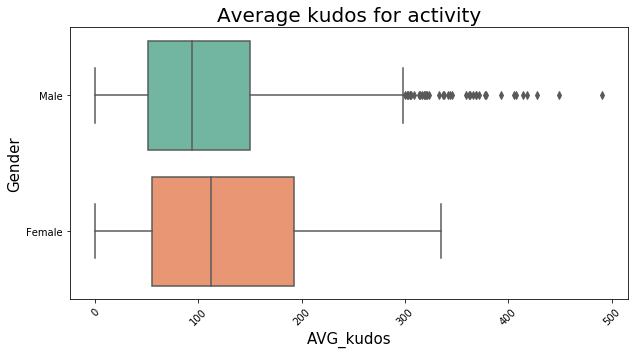

Average comments for activity


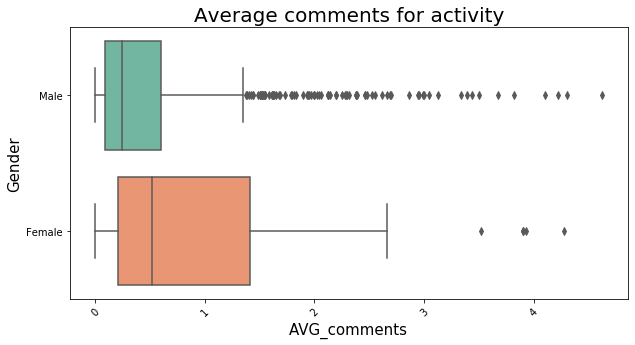

Average kudos given by athlete between activites


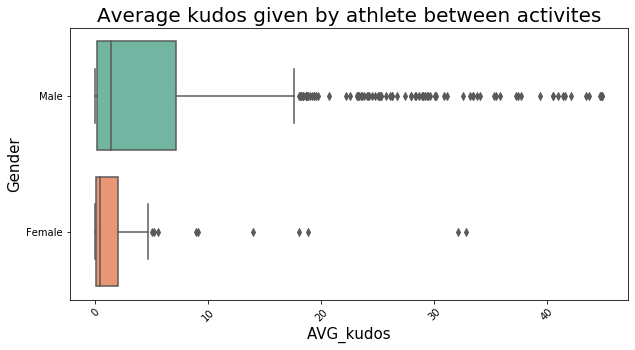

Average comments given by athlete between activites


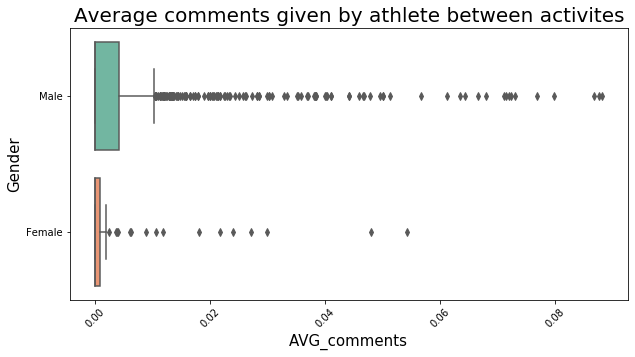

In [326]:
box_plots_cols=[
                                           'Average kudos for activity','Average comments for activity',
                                           'Average kudos given by athlete between activites',
                'Average comments given by athlete between activites']
for i in box_plots_cols:
    print (i)
    plt.rcParams["figure.figsize"] = (10,5)
    ax = sns.boxplot(x=i,y='gender_label',data=data_athletes_for_box_plots_new,orient='h',palette="Set2")
    ax.axes.set_title(i,fontsize=20)
    ax.set_ylabel("Gender",fontsize=15)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    value=i.split(" ")[1]
    ax.set_xlabel(f'AVG_{value}',fontsize=15)
#     max_m=data_athletes_for_box_plots[i].max()
#     ax.set(ylim=(0, max_m+0.2))
    plt.show()

In [327]:
data_athletes

,gender,Athlete_ID,ID,activity_type,date_,day_,day_time,area,country,distance,...,photos,acheivments,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites,Average kudos for activity,Average comments for activity,common_activity
0,M,10046920,2988817074,Walk,2020-01-06,Monday,9:01 PM,Florianópolis,Brazil,9.25,...,False,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
1,M,10046920,2993165259,Ride,2020-01-08,Wednesday,5:49 AM,Pirassununga,Brazil,77.65,...,False,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
2,M,10046920,2998457346,Walk,2020-01-10,Friday,8:57 AM,Pirassununga,Brazil,6.02,...,False,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
3,M,10046920,3001411583,Ride,2020-01-11,Saturday,5:55 AM,Pirassununga,Brazil,57.63,...,True,4,1,4,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
4,M,10046920,3013356250,Ride,2020-01-15,Wednesday,6:17 AM,Pirassununga,Brazil,44.31,...,False,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256674,M,9949090,3522446313,Run,2020-05-27,Wednesday,3:28 PM,Lubbock,USA,7.58,...,False,6,0,0,7,0.0,0.0,63.57142857142857,0.0,Run
256675,M,9949090,3538422609,Run,2020-05-30,Saturday,3:39 PM,Lubbock,USA,8.04,...,False,1,0,0,7,0.0,0.0,63.57142857142857,0.0,Run
256676,M,9949090,3719366643,Run,2020-07-05,Sunday,2:14 PM,Lubbock,USA,7.02,...,False,6,0,2,7,0.0,0.0,63.57142857142857,0.0,Run
256677,M,9949090,3728892980,Run,2020-07-07,Tuesday,3:11 PM,Lubbock,USA,3.42,...,False,2,0,0,7,0.0,0.0,63.57142857142857,0.0,Run


In [328]:
data_athletes['gender_label']=np.where(data_athletes['gender']=='F','Female','Male')
data_athletes.head().sort_values('Athlete_ID')

,gender,Athlete_ID,ID,activity_type,date_,day_,day_time,area,country,distance,...,acheivments,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites,Average kudos for activity,Average comments for activity,common_activity,gender_label
0,M,10046920,2988817074,Walk,2020-01-06,Monday,9:01 PM,Florianópolis,Brazil,9.25,...,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male
1,M,10046920,2993165259,Ride,2020-01-08,Wednesday,5:49 AM,Pirassununga,Brazil,77.65,...,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male
2,M,10046920,2998457346,Walk,2020-01-10,Friday,8:57 AM,Pirassununga,Brazil,6.02,...,0,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male
3,M,10046920,3001411583,Ride,2020-01-11,Saturday,5:55 AM,Pirassununga,Brazil,57.63,...,4,1,4,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male
4,M,10046920,3013356250,Ride,2020-01-15,Wednesday,6:17 AM,Pirassununga,Brazil,44.31,...,13,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male


In [329]:
data_athletes.groupby('Athlete_ID').sum()

,ID,distance,relative_effort,elevation,calories,temperature,feels_like,wind_speed,heart_rate,max_hr,...,group_activity,photos,acheivments,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites,Average kudos for activity,Average comments for activity
Athlete_ID,,,,,,,,,,,,,,,,,,,,,
61723,1270054172508,15196.830000000007,-319,62353.0,289824,8073,8126,2116.4999999999995,-319.0,-319,...,89.0,2.0,1471,6,1471,101761,800.01577287066,14.088328075709724,49345.99999999981,258.9999999999996
150168,1498851259445,16414.320000000003,11600,275508.0,429354,9344,12303,2132.199999999999,22367.019699999997,26432,...,149.0,41.0,2740,54,2626,139876,0.0,0.0,35467.9999999999,128.9999999999997
183769,848935114761,5988.280000000001,12791,54171.0,122659,19503,19496,247.59999999999994,25416.0,29947,...,183.0,201.0,356,346,356,50176,30.270270270270448,2.018018018018009,39214.0,406.999999999999
186522,1500628869102,32499.779999999977,409,170413.0,723746,8111,10138,5188.899999999999,2626.0,3447,...,183.0,92.0,6050,264,6050,143641,1.0053050397878063,1.0053050397878063,1277752.0000000016,3284.0000000000164
196354,1550833369759,4976.840000000004,9075,126865.0,190069,9059,11033,1465.700000000001,33149.2954,29593,...,66.0,120.0,170,122,170,153664,46.23589743589771,6.030769230769211,8470.999999999964,179.00000000000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73904457,55002352865,38.77,-12,265.0,-12,1188,1188,-12.0,-12.0,-12,...,0.0,0.0,0,0,0,144,1.2,0.0,6.0,0.0
73908109,79125575014,75.88000000000001,-17,252.0,-17,1683,1683,-17.0,-17.0,-17,...,0.0,0.0,0,0,0,289,0.0,0.0,2.999999999999999,0.0
76509671,129740736150,136.02999999999997,-26,1051.0,-26,2574,2574,-26.0,-26.0,-26,...,0.0,5.0,68,13,0,676,0.0,0.0,425.00000000000017,0.9999999999999996


In [330]:
group_activity_per_atheleth=data_athletes.groupby('Athlete_ID').sum().reset_index()[['Athlete_ID','group_activity']]
data_athletes=data_athletes.merge(group_activity_per_atheleth,on='Athlete_ID',suffixes=(['_','_sum']))


In [331]:
data_athletes

,gender,Athlete_ID,ID,activity_type,date_,day_,day_time,area,country,distance,...,photo_count,segments_achievements,number_of_activities,Average kudos given by athlete between activites,Average comments given by athlete between activites,Average kudos for activity,Average comments for activity,common_activity,gender_label,group_activity_sum
0,M,10046920,2988817074,Walk,2020-01-06,Monday,9:01 PM,Florianópolis,Brazil,9.25,...,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male,115.0
1,M,10046920,2993165259,Ride,2020-01-08,Wednesday,5:49 AM,Pirassununga,Brazil,77.65,...,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male,115.0
2,M,10046920,2998457346,Walk,2020-01-10,Friday,8:57 AM,Pirassununga,Brazil,6.02,...,0,0,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male,115.0
3,M,10046920,3001411583,Ride,2020-01-11,Saturday,5:55 AM,Pirassununga,Brazil,57.63,...,1,4,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male,115.0
4,M,10046920,3013356250,Ride,2020-01-15,Wednesday,6:17 AM,Pirassununga,Brazil,44.31,...,0,13,193,2.994764397905759,0.0,608.4041450777202,0.49740932642487046,Ride,Male,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256674,M,9949090,3522446313,Run,2020-05-27,Wednesday,3:28 PM,Lubbock,USA,7.58,...,0,0,7,0.0,0.0,63.57142857142857,0.0,Run,Male,0.0
256675,M,9949090,3538422609,Run,2020-05-30,Saturday,3:39 PM,Lubbock,USA,8.04,...,0,0,7,0.0,0.0,63.57142857142857,0.0,Run,Male,0.0
256676,M,9949090,3719366643,Run,2020-07-05,Sunday,2:14 PM,Lubbock,USA,7.02,...,0,2,7,0.0,0.0,63.57142857142857,0.0,Run,Male,0.0
256677,M,9949090,3728892980,Run,2020-07-07,Tuesday,3:11 PM,Lubbock,USA,3.42,...,0,0,7,0.0,0.0,63.57142857142857,0.0,Run,Male,0.0


In [332]:
data_athletes['%_of_group_activities']=data_athletes['group_activity_sum']/data_athletes['number_of_activities']

In [333]:
data_athletes['%_of_group_activities']=np.round(data_athletes['%_of_group_activities'],2)
data_athletes['%_of_group_activities'].describe()

count              256679.0
mean    0.19037104710552757
std     0.21364617328013058
min                     0.0
25%                    0.02
50%                    0.11
75%                    0.31
max                     1.0
Name: %_of_group_activities, dtype: float64

In [334]:
conditions = [
    (data_athletes['%_of_group_activities']<=0.3),
    (data_athletes['%_of_group_activities']>0.3)
     ]

# create a list of the values we want to assign for each condition
values = [ 'Up to 30%','Above 30%']

# create a new column and use np.select to assign values to it using our lists as arguments
data_athletes['Group activity of total activities'] = np.select(conditions, values)

In [336]:
data_athletes_for_pai=data_athletes[['Athlete_ID','gender','common_activity','Group activity of total activities']].drop_duplicates()

In [337]:
data_athletes_for_pai.Athlete_ID.nunique()

1000

In [338]:
data_athletes_for_pai['gender_label']=np.where(data_athletes_for_pai['gender']=='F','Female','Male')

In [339]:
summary=pd.read_csv('summary_by_ath.csv',encoding='latin-1').rename(columns={'ï»¿athlete_ID':'Athlete_ID'})

In [341]:
data_athletes_for_pai=data_athletes_for_pai.merge(summary,on='Athlete_ID')

In [342]:
data_athletes_for_pai

,Athlete_ID,gender,common_activity,Group activity of total activities,gender_label,clubs,challenges,avarage_activities
0,10074928,M,Run,Up to 30%,Male,148,256,14.57971014
1,1010986,M,Virtual Ride,Above 30%,Male,18,63,5.623188406000001
2,10166508,M,Ride,Above 30%,Male,41,18,0.52173913
3,10186784,M,Ride,Above 30%,Male,33,26,1.9710144930000002
4,10218095,M,Workout,Up to 30%,Male,351,97,3.1884057969999997
...,...,...,...,...,...,...,...,...
870,9691035,F,Ride,Up to 30%,Female,167,75,7.101449275
871,9727571,M,Ride,Up to 30%,Male,134,117,3.2318840580000003
872,9775468,M,Run,Up to 30%,Male,111,46,10.01428571
873,9899989,M,Ride,Above 30%,Male,12,21,2.8115942030000003


In [343]:
data_athletes_for_pai.columns

Index(['Athlete_ID', 'gender', 'common_activity',
       'Group activity of total activities', 'gender_label', 'clubs',
       'challenges', 'avarage_activities'],
      dtype='object')

In [344]:
data_athletes_for_pai.describe([.75,.8,.85,.9,.95])

,Athlete_ID,clubs,challenges,avarage_activities
count,875.0,875.0,875.0,875.0
mean,25280628.63885714,175.77142857142857,102.16228571428572,4.341343799587426
std,17907609.396233547,485.9684523828104,137.3483226468382,3.629968229052699
min,61723.0,1.0,1.0,0.043478261
50%,20984393.0,42.0,49.0,3.4347826089999995
75%,37978612.5,135.0,139.0,5.804347825999999
80%,41944587.2,172.20000000000005,172.20000000000005,6.5536231886
85%,46853168.5,240.79999999999995,212.0,7.2579710143
90%,50693962.400000006,376.8000000000002,274.20000000000005,8.2869565216
95%,61572627.400000006,695.2999999999986,367.8999999999994,10.975298379


In [345]:
import math
data_athletes_for_pai['avarage_activities_up']=data_athletes_for_pai['avarage_activities'].apply(np.round)

In [346]:
data_athletes_for_pai=data_athletes_for_pai[(data_athletes_for_pai.common_activity=='Run')|(data_athletes_for_pai.common_activity=='Ride')]

In [347]:
data_athletes_for_pai

,Athlete_ID,gender,common_activity,Group activity of total activities,gender_label,clubs,challenges,avarage_activities,avarage_activities_up
0,10074928,M,Run,Up to 30%,Male,148,256,14.57971014,15.0
2,10166508,M,Ride,Above 30%,Male,41,18,0.52173913,1.0
3,10186784,M,Ride,Above 30%,Male,33,26,1.9710144930000002,2.0
7,10326952,M,Run,Above 30%,Male,327,812,7.7971014489999995,8.0
8,10408847,M,Ride,Up to 30%,Male,5,1,5.869565217000001,6.0
...,...,...,...,...,...,...,...,...,...
870,9691035,F,Ride,Up to 30%,Female,167,75,7.101449275,7.0
871,9727571,M,Ride,Up to 30%,Male,134,117,3.2318840580000003,3.0
872,9775468,M,Run,Up to 30%,Male,111,46,10.01428571,10.0
873,9899989,M,Ride,Above 30%,Male,12,21,2.8115942030000003,3.0


In [348]:
len(data_athletes_for_pai[data_athletes_for_pai.avarage_activities_up>10])

30

In [349]:
data_athletes_for_pai['avarage_activities_up']= np.where(data_athletes_for_pai['avarage_activities_up']<16,data_athletes_for_pai['avarage_activities_up'],15)

C:\Users\noamatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [350]:
data_athletes_for_pai['avarage_activities_up'].describe()

count                628.0
mean     4.020700636942675
std     3.0184786802978554
min                    0.0
25%                    2.0
50%                    3.0
75%                   5.25
max                   15.0
Name: avarage_activities_up, dtype: float64

In [351]:
data_athletes_for_pai[data_athletes_for_pai.avarage_activities_up.isna()]

,Athlete_ID,gender,common_activity,Group activity of total activities,gender_label,clubs,challenges,avarage_activities,avarage_activities_up


In [352]:
data_athletes_for_pai.groupby('avarage_activities_up').count()

,Athlete_ID,gender,common_activity,Group activity of total activities,gender_label,clubs,challenges,avarage_activities
avarage_activities_up,,,,,,,,
0.0,28,28,28,28,28,28,28,28
1.0,97,97,97,97,97,97,97,97
2.0,93,93,93,93,93,93,93,93
3.0,117,117,117,117,117,117,117,117
4.0,79,79,79,79,79,79,79,79
5.0,57,57,57,57,57,57,57,57
6.0,48,48,48,48,48,48,48,48
7.0,41,41,41,41,41,41,41,41
8.0,19,19,19,19,19,19,19,19


In [353]:
data_athletes_for_pai.sort_values('avarage_activities_up')

,Athlete_ID,gender,common_activity,Group activity of total activities,gender_label,clubs,challenges,avarage_activities,avarage_activities_up
558,405388,M,Ride,Up to 30%,Male,66,1,0.242857143,0.0
271,21124502,M,Ride,Up to 30%,Male,8,5,0.304347826,0.0
269,20990035,M,Ride,Up to 30%,Male,13,5,0.057971014,0.0
828,8007373,M,Ride,Above 30%,Male,10,1,0.18840579699999999,0.0
70,12161399,M,Ride,Above 30%,Male,192,3,0.405797101,0.0
...,...,...,...,...,...,...,...,...,...
363,27020889,M,Ride,Up to 30%,Male,13,127,16.02898551,15.0
337,25217562,M,Ride,Up to 30%,Male,6,322,17.5942029,15.0
86,1266905,M,Run,Up to 30%,Male,116,196,17.17142857,15.0
414,30551431,M,Ride,Up to 30%,Male,114,292,16.20588235,15.0


In [354]:
len(data_athletes_for_pai)

628

In [359]:
import plotly.express as px
df = data_athletes_for_pai[['common_activity',
       'Group activity of total activities',
       'avarage_activities_up']].sort_values('avarage_activities_up')
fig = px.parallel_categories(df,dimensions=['common_activity','Group activity of total activities',
                                            'avarage_activities_up'],labels={'common_activity':
                                                                             'Main Activity',
                                                                             'Group activity of total activities':
                                                                             'Group activity(%)',
                                                                             'avarage_activities_up':
                                                                             'Average activities per week'},
                                                                            color='avarage_activities_up',
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()
fig.write_html("activities_per_week.html")